In [1]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let us now reade the dataset
data = pd.read_csv("employment-data.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Let us check the dimentions of the dataset
data.shape

(1460, 81)

In [4]:
# Now let us get the column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To get the description of the dataset like mean, median, etc.
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Now let us see the sum of null values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We see that there are null values in the following columns
1. LotFrontage 
2. Alley
3. BsmtQual
4. BsmtCond
5. BsmtExposure
6. BsmtFinType1
7. BsmtFinType2 
8. Electrical
9. FireplaceQu
10. GarageType
11. GarageYrBlt
12. GarageFinish
13. GarageQual
14. GarageCond
15. PoolQC
16. Fence
17. MiscFeature

Now let us get the percentage of null values for the columns containing null data

In [7]:
dataset_percentage = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
dataset_percentage.index.name = 'Features'
dataset_percentage.head()


,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [8]:
null_dataset = dataset_percentage[dataset_percentage["Null %"] > 0]
null_dataset

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


As per the data dictionary provided, the nulls in these columns indicates the absence of feature which may affect the price
Hence, let us impute the categorical variables with 'none'

In [9]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    data[i].fillna("none", inplace=True)

Let us confirm to see if our columns are dropped

In [10]:
# Check nulls once again

data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

#### Outliers

In [11]:
#Lets check these columns one by one
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [13]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [14]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [15]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [16]:
# Crosscheck the updated 'LotFrontage' column
data['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
data['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [20]:
len(data.index)

1460

We see that the number of rows are retained

### EDA 

Let us select all the (numeric)integer and float data types from the dataset

In [21]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Let us drop the id column as it holds no value in our analysis

In [22]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Let us plot the certain features against the sale price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

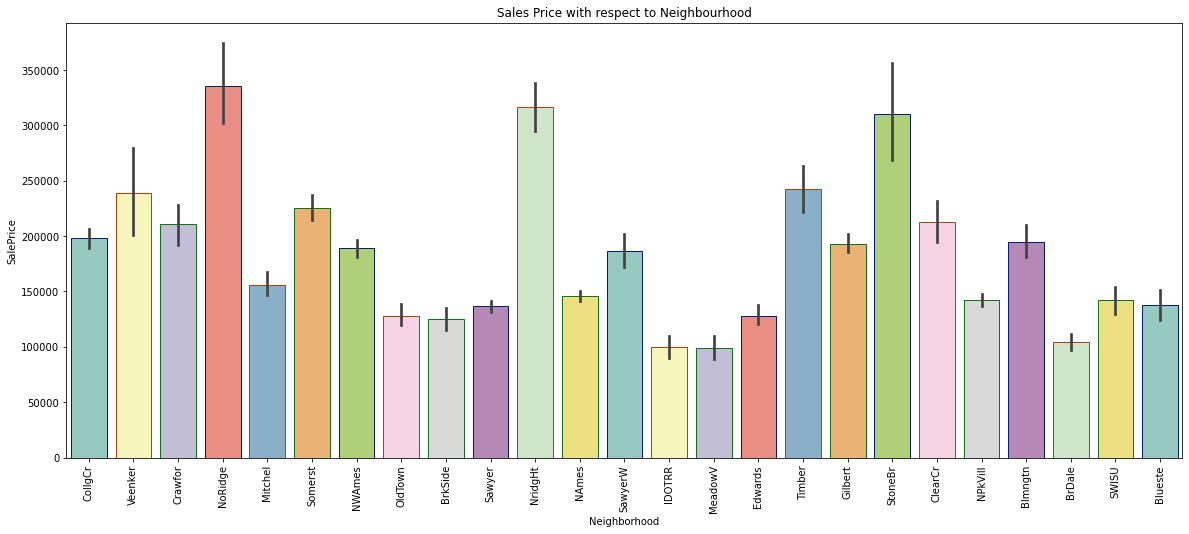

In [23]:
#Neighborhood
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

We see that certain neighborhoods have high sale price

Next, lets plot against the over all condition of the property

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

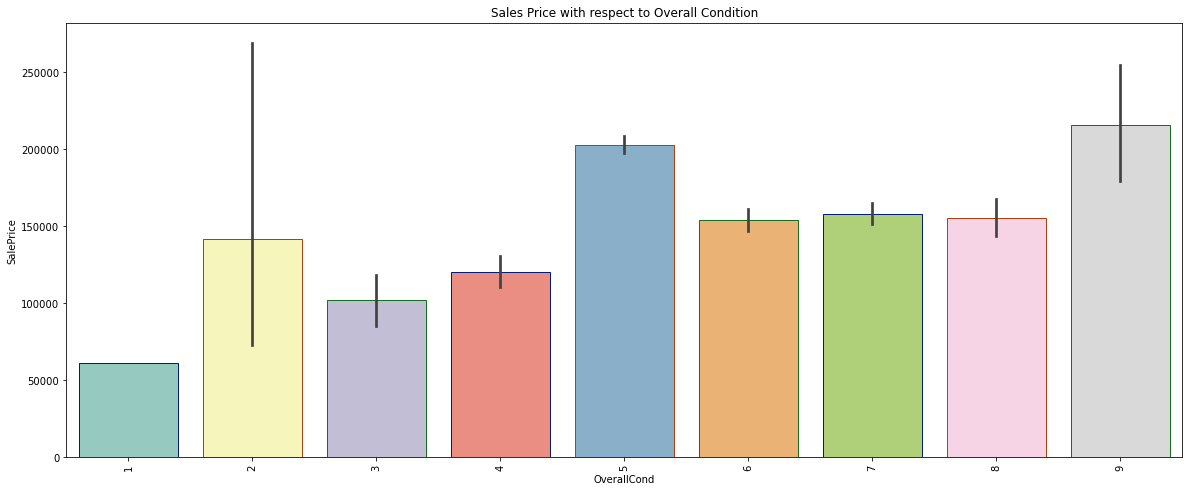

In [24]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

This doesnt have a clear pattern on the sale price of the property

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

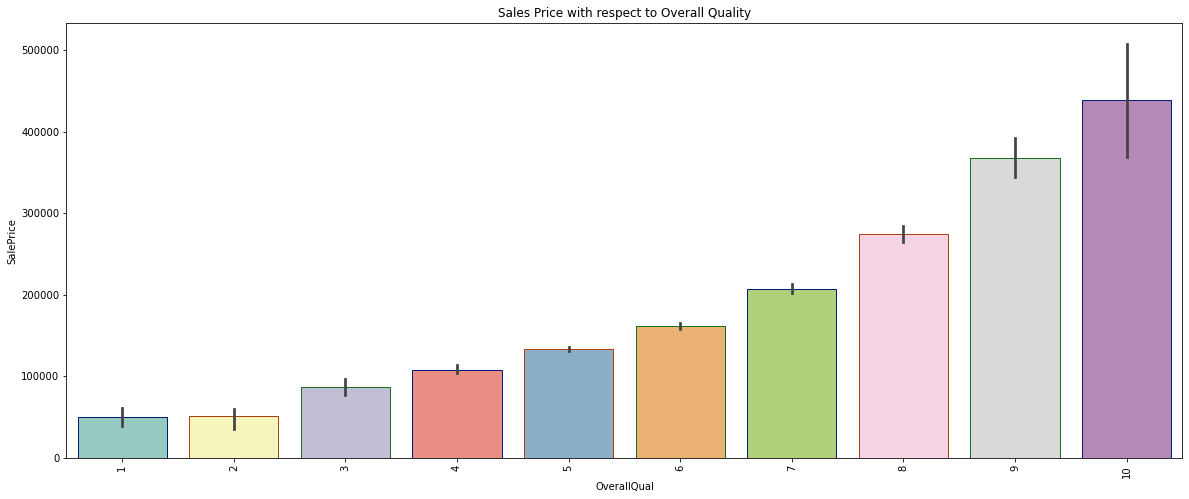

In [25]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

This have a very clear indication that the price increases with better quality

Let us now have a distribution plot of the sales price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

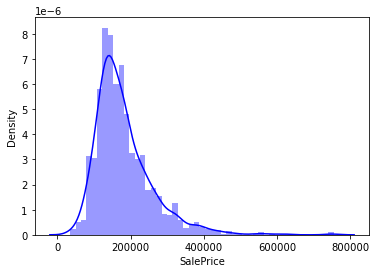

In [26]:
sns.distplot(data['SalePrice'], color='blue')

In [27]:
raw_data = data.copy

We see that the data is towards the left of the plot. Let us now perform log on the dataset to obtain centralized data

In [28]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

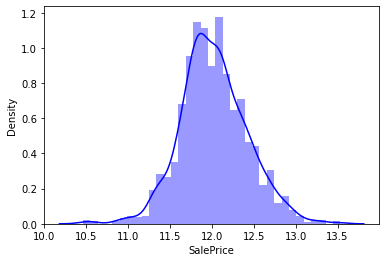

In [29]:
sns.distplot(data['SalePrice'], color='blue')

Now we see a more centralized data

### Correlation 

Now let us see the correlation data

In [30]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Now let us observe the heatmap of the correlated data

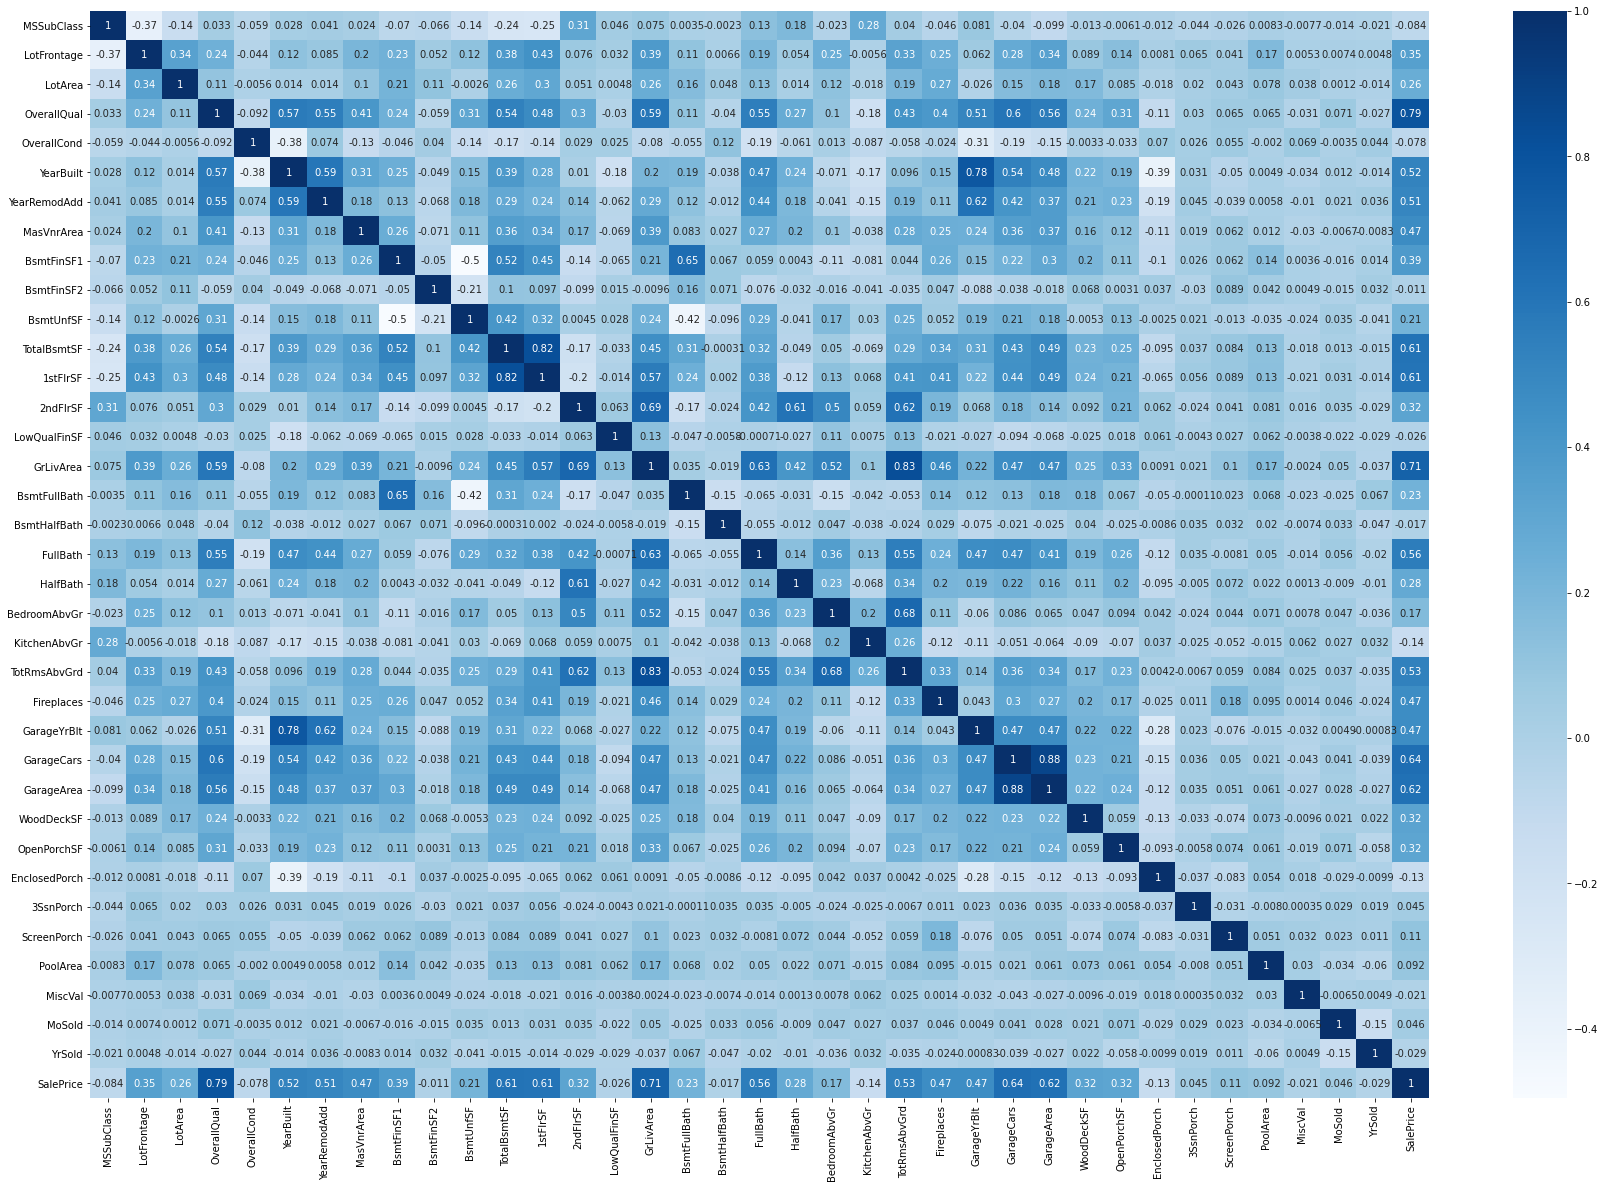

In [31]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="Blues", annot=True)
plt.show()

We can observe high correlation for certain features, hence we will drop those features. But before we do that, lets have a look at their predictive power

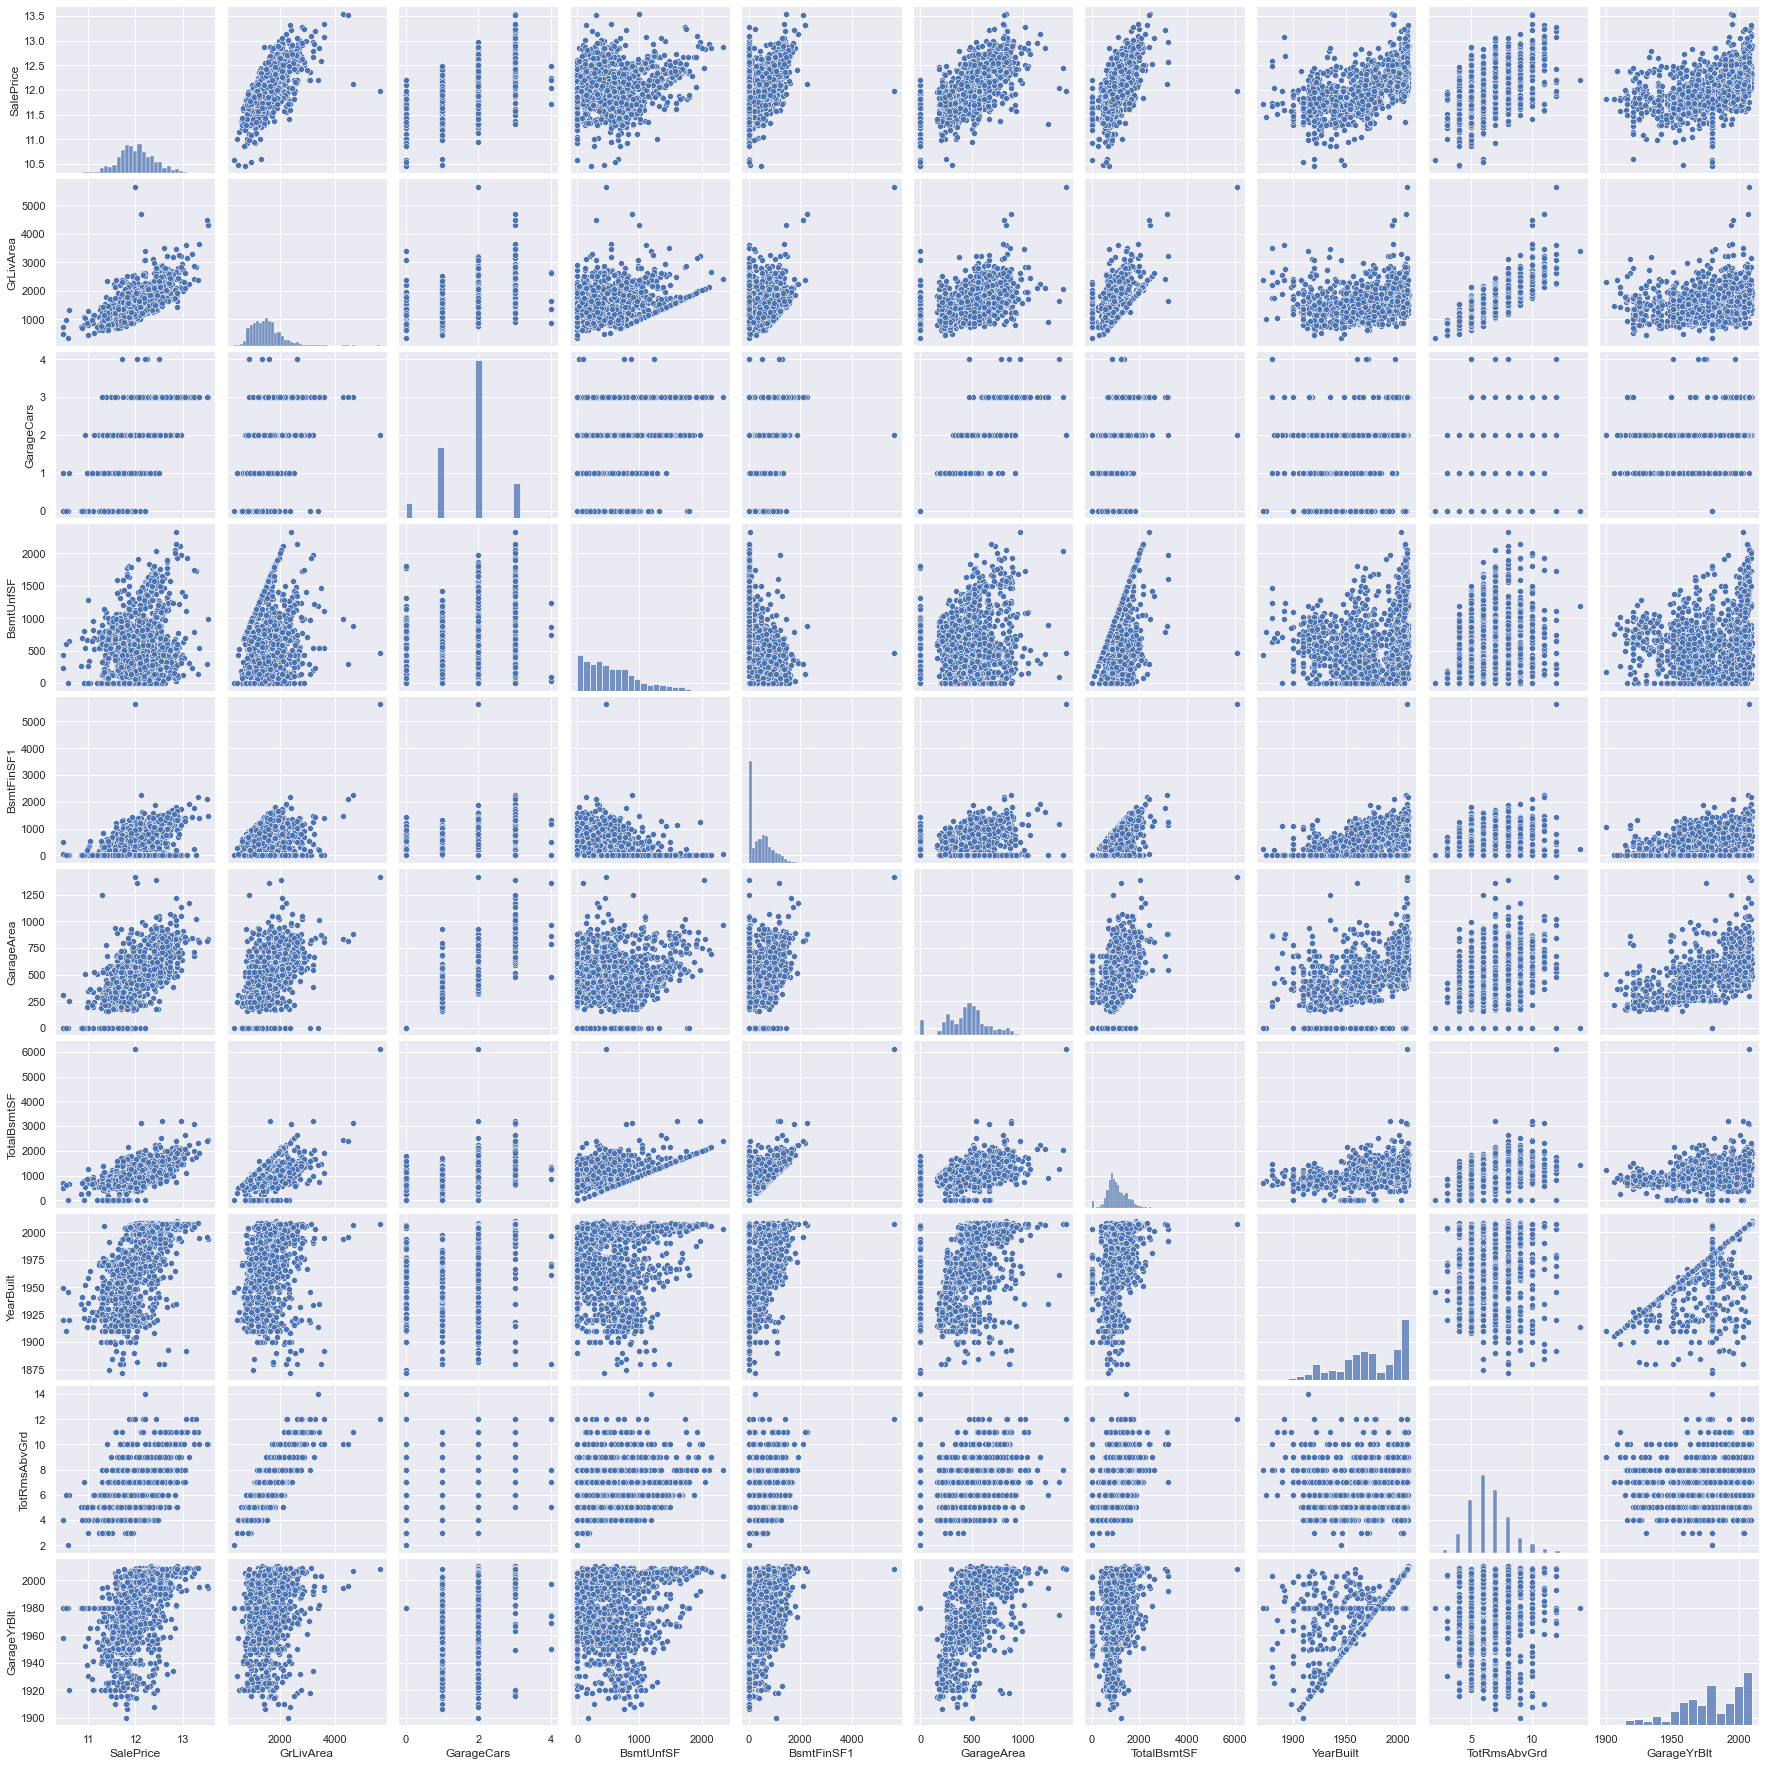

In [33]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5, palette='Set3')
plt.show()

Let us drop those features that are highly correlated and do not contribute to the analysis

The features that we are dropping are:
1. GarageCars
2. BsmtUnfSF
3. TotRmsAbvGrd
4. GarageYrBlt

Let us drop the above features

In [34]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220


Let us now exclude all the objects and include only numeric data

In [35]:
#Numeric columns
data.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,11.864469


Lets see GrLivArea vs SalePrice

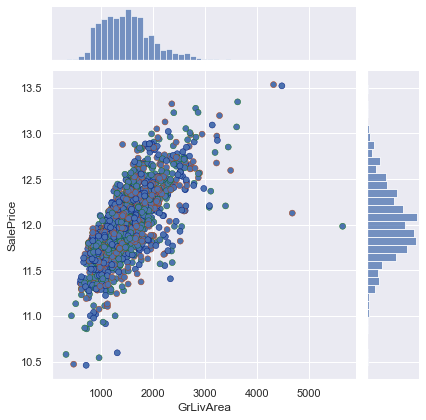

In [36]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Now let us remove some outliers at quantile 25% and 75%

In [37]:
q1 = data['GrLivArea'].quantile(0.25)
q3 = data['GrLivArea'].quantile(0.75)
value = q3-q1
lower_value  = q1-1.5*value
higer_value = q3+1.5*value
out= data[(data['GrLivArea']<higer_value) & (data['GrLivArea']>lower_value)]
data = out

Let us see the shape of the dataset now

In [38]:
data.shape

(1429, 77)

When we now plot the joint plot we see a more centered appearance

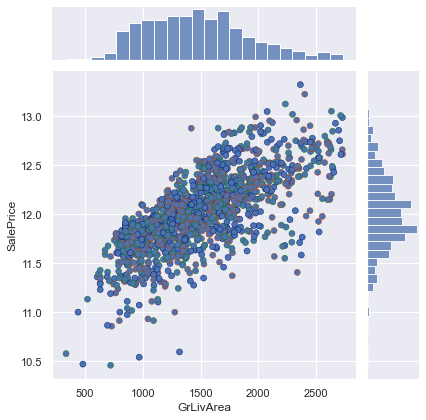

In [39]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Lets see LotFrontage vs SalePrice

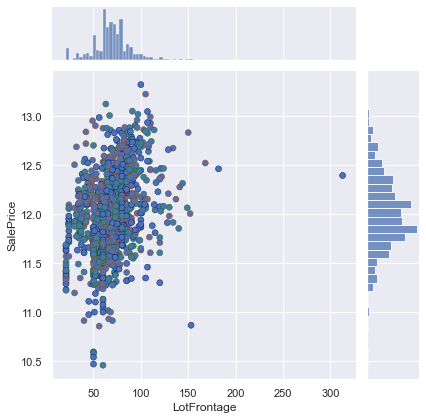

In [40]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Lets see LotArea vs SalePrice

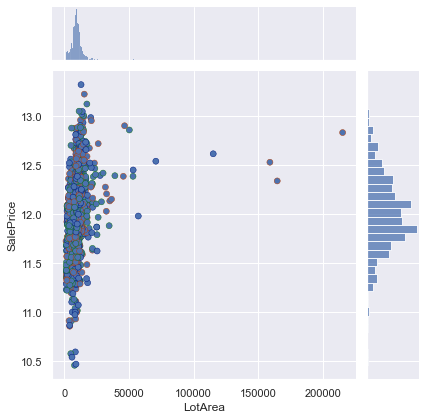

In [42]:
sns.jointplot(x='LotArea', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Lets see 1stFlrSF vs SalePrice

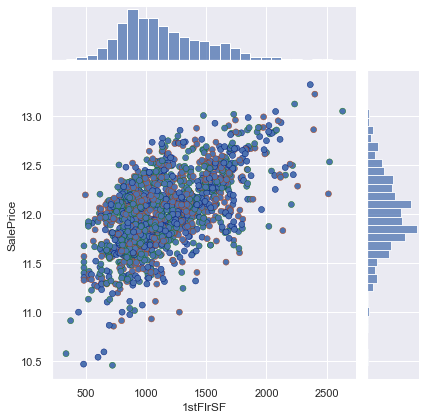

In [43]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Lets see 2ndFlrSF vs SalePrice

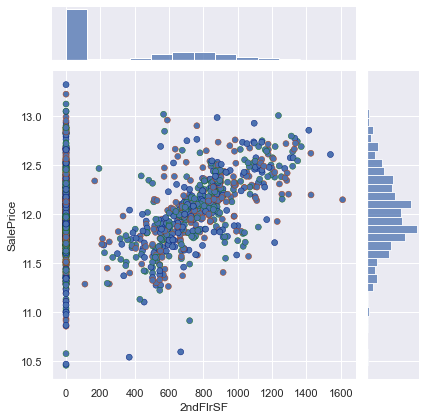

In [44]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Lets see OverallQual vs SalePrice

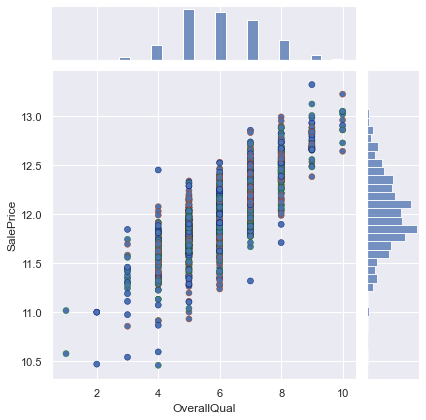

In [45]:
sns.jointplot(x='OverallQual', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

Lets see OverallCond vs SalePrice

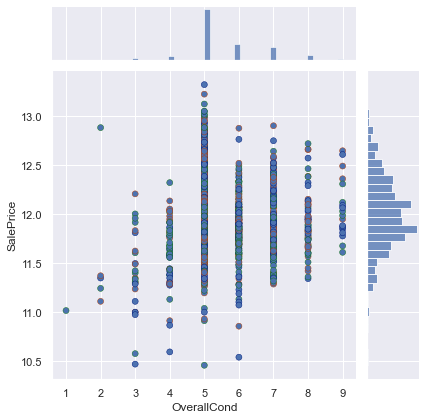

In [46]:
sns.jointplot(x='OverallCond', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

We can observe the following from the above analysis:
1. Ground floor SF has a steady increase in the sale price
2. 1st floor SF too has a steady increase in the sale price
3. 2nd floor SF too has a steady increase in the sale price and also note that '0' 2nd floor SF too has a steady increase in sale price.
4. As the overall quality increases the sale price increases.

Let us derive the age of the property

In [47]:
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220,8


Now that we have the property age, let us plot it against the sale price

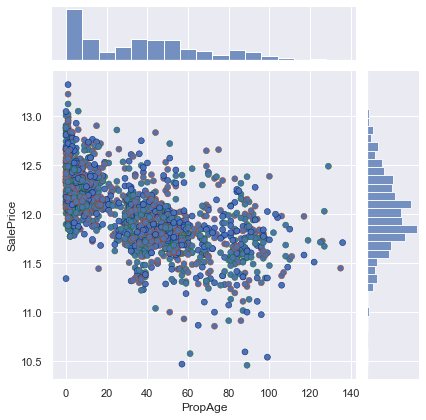

In [48]:
sns.jointplot(x='PropAge', y='SalePrice', data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

We can observe the trend where a newer property is more pricier than an old property

Now that we have already got the age of the property, we can discard a few columns such as mosold, yrsold, yearbuilt and yearremodadd

In [49]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,WD,Normal,12.429220,8


Let us drop columns that show low variance

In [50]:
data.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [51]:
data.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

We see very low variance in these two columns, so lets drop them

In [52]:
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

let us also drop id

In [53]:
data = data.drop(['Id'], axis = 1)

Now lets see the variance of the columns that are left out

In [54]:
variation_ds= data.select_dtypes(include=['float64', 'int64'])
variation_ds

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,12.247699,5
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,12.109016,31
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,12.317171,7
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,11.849405,91
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,12.072547,8
1456,20,85.0,13175,6,6,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,12.254868,32
1457,70,66.0,9042,7,9,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,12.493133,69
1458,20,68.0,9717,5,6,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,11.864469,60


In [55]:
for i in variation_ds:
    print(data[i].value_counts())

20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
144.0      1
88.5       1
38.0       1
141.0      1
111.0      1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
8926      1
17120     1
6882      1
13031     1
8190      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
180.0      8
108.0      8
16.0       7
        ... 
375.0      1
342.0      1
137.0      1
530.0      1
415.0      1
Name: MasVnrArea, Length: 315, dtype: int64
0       46

Let us drop the following columns as they have very high null values and low variance:
'PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional'

In [56]:
data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

Now lets check the shape of the dataset

In [57]:
data.shape

(1429, 62)

#### Dummy creation
Convertion of Categorical to Numerical

In [58]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Let us now proceed with the regression

Dropping SalePrice in X

In [59]:
X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Creating the response variable Y

In [60]:
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Splitting into Train and Test

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [64]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.145212,1.323938,-0.300737,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,-0.250936,2.754667,-0.727119,1.478865,-0.222797,2.231812,1.267298,0.485675,-0.351334,-0.378185,-0.115383,-0.268919,-0.054574,-1.209026,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.152993,0.360916,-0.300737,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,1.131973,-0.250936,-0.990631,-0.727119,0.212713,-0.222797,-0.918240,-0.857140,-0.758474,-0.368801,-0.378185,-0.115383,3.351363,-0.054574,0.445587,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.564274,-0.223442,-0.300737,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,-0.918240,0.077613,0.257158,-0.718144,2.265177,-0.115383,-0.268919,-0.054574,-0.447904,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
467,0.324542,0.462250,-0.086269,-0.764271,1.258264,0.774624,-0.106571,-0.300737,-0.764234,-0.722635,1.060654,-0.111211,0.401627,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,2.231812,-0.734395,0.663411,-0.718144,-0.378185,-0.115383,-0.268919,-0.054574,0.908879,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
993,0.085645,-0.058435,-0.148775,-0.012775,-0.513939,-0.564274,-1.008820,-0.300737,-0.709617,-1.115022,1.046127,-0.111211,0.079368,-0.816345,-0.250936,0.882018,1.275964,0.212713,-0.222797,-0.918240,0.455291,-0.758474,-0.106794,-0.378185,-0.115383,-0.268919,-0.054574,-1.209026,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [65]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.282163,-0.495702,-0.339155,0.620334,3.325664,-0.606456,-0.211663,0.997135,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,1.073876,-0.215271,-1.099305,-0.803081,0.172438,-0.185172,-0.988037,0.530538,1.165362,-0.747921,-0.328244,-0.127886,-0.27671,0.0,1.326790,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
335,3.002345,0.729276,17.009026,-0.825989,0.435637,-0.606456,1.881258,0.620602,1.075768,1.258064,-0.435654,-0.09698,0.616745,2.969732,-0.215271,0.802316,-0.803081,0.172438,-0.185172,2.151725,0.299231,4.227488,-0.747921,-0.328244,-0.127886,-0.27671,0.0,0.303675,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
200,-0.851246,0.484280,-0.190859,-1.549150,-0.527705,-0.606456,-1.026482,-0.257974,0.157612,-0.084718,-0.835813,-0.09698,-0.843999,-0.821980,-0.215271,0.802316,-0.803081,-1.081391,-0.185172,-0.988037,-0.138775,0.248203,0.135073,-0.328244,-0.127886,-0.27671,0.0,-0.924063,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
214,0.055482,-0.005711,0.068493,-0.102827,1.398980,0.272709,-0.146477,-0.257974,-0.891708,-1.249541,0.848688,-0.09698,-0.248718,-0.821980,-0.215271,-1.099305,1.176929,0.172438,-0.185172,-0.988037,-0.832694,-0.728127,-0.251236,-0.328244,-0.127886,-0.27671,0.0,-0.037363,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1003,0.735527,0.484280,0.134598,-0.825989,0.435637,0.335917,-1.026482,-0.257974,1.515413,1.422541,-0.835813,-0.09698,0.383905,-0.821980,-0.215271,0.802316,-0.803081,1.426267,4.779760,-0.988037,0.294310,-0.728127,-0.747921,-0.328244,-0.127886,-0.27671,0.0,-0.105571,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Model Bulding

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Lets run RFE
and since we have more than 250 variables for our analysis, we can run RFE to select the ones that have high predictability

In [67]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

Let us check the Ranks

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 35),
 ('LotFrontage', False, 84),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 68),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 80),
 ('HalfBath', False, 72),
 ('BedroomAbvGr', False, 106),
 ('KitchenAbvGr', False, 96),
 ('Fireplaces', False, 110),
 ('GarageArea', False, 13),
 ('WoodDeckSF', False, 59),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 89),
 ('ScreenPorch', False, 56),
 ('PoolArea', False, 78),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 92),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 105),
 ('LandContour_HLS', False, 36),
 

Let us select the ones that have rfe.support_ as true

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyl

The above list has the columns that have rfe.support_ as true

Now lets fetch the rfe.support_ values that are false

In [70]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'PavedDrive_Y', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_none', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=110)

Let us now create an dataframe with RFE selected values

In [71]:
X_train_rfe = X_train[col]

In [72]:
X_train_rfe = pd.DataFrame(X_train[col])

In [73]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Duplex,BldgType_Twnhs,HouseStyle_2.5Fin,HouseStyle_2.5Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Wood,BsmtQual_none,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_none,BsmtFinType2_GLQ,CentralAir_Y,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_TA,GarageQual_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
11,0.154684,2.241710,-0.513939,1.323938,0.345478,0.113320,1.995226,-0.111211,1.923409,-1.209026,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1070,-0.020017,-0.764271,-0.513939,0.360916,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,0.445587,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
513,-0.115156,-0.012775,-0.513939,-0.223442,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.447904,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
467,-0.086269,-0.764271,1.258264,-0.106571,-0.764234,-0.722635,1.060654,-0.111211,0.401627,0.908879,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
993,-0.148775,-0.012775,-0.513939,-1.008820,-0.709617,-1.115022,1.046127,-0.111211,0.079368,-1.209026,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Let us find the shape of the rfe dataset

In [74]:
X_train_rfe.shape

(1000, 100)

Let us predict the R2 score for both test and train sets

In [75]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397590783819888

In [76]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.228232551581477e+20

### Lasso and Ridge Regression

#### 1. Lasso Regression

In [77]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 210)
y_train (1000,)


In [78]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Let us print the best hyperparameter alpha

In [79]:
print(model_cv.best_params_)

{'alpha': 0.001}


Let us see the cv results

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120355,0.023372,0.004389,0.001017,0.0001,{'alpha': 0.0001},-0.089702,-0.078848,-0.088372,-0.085734,-0.077120,-0.083955,0.005070,2,-0.065801,-0.068092,-0.065346,-0.066311,-0.067607,-0.066631,0.001052
1,0.020161,0.002314,0.003768,0.000997,0.001,{'alpha': 0.001},-0.082755,-0.083177,-0.087933,-0.082553,-0.079647,-0.083213,0.002670,1,-0.075478,-0.077009,-0.074278,-0.076496,-0.076136,-0.075880,0.000943
2,0.008853,0.002103,0.003192,0.000977,0.01,{'alpha': 0.01},-0.090790,-0.093399,-0.097715,-0.092036,-0.088628,-0.092514,0.003038,3,-0.091236,-0.090420,-0.089019,-0.090524,-0.091156,-0.090471,0.000796
3,0.007955,0.001516,0.003191,0.000977,0.05,{'alpha': 0.05},-0.129246,-0.113828,-0.132264,-0.112722,-0.113127,-0.120237,0.008648,4,-0.119298,-0.118718,-0.117623,-0.118882,-0.119586,-0.118822,0.000673
4,0.008359,0.001502,0.003191,0.000399,0.1,{'alpha': 0.1},-0.172055,-0.148653,-0.168033,-0.143888,-0.146182,-0.155762,0.011827,5,-0.155429,-0.155643,-0.153254,-0.153682,-0.156270,-0.154856,0.001174


Let us now plot the Mean test and train sets against alpha scores

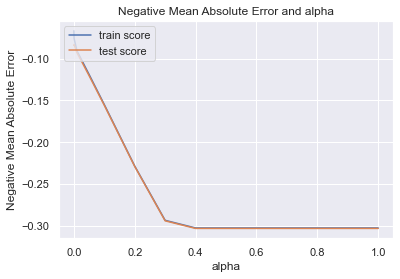

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We observe that the negative mean absolute error stabilises at 0.4 and after.
So we choose alpha to be low to balance off the trade off between the bias vairance and thus getting the coefficients of smallest of features.

In [170]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-9.65321317e-03,  1.18988626e-02,  1.93751557e-02,  8.36559202e-02,
        5.71689422e-02,  9.45115383e-04,  3.64282688e-02,  4.63396338e-03,
        3.78452192e-02,  0.00000000e+00,  0.00000000e+00, -2.30492221e-03,
        1.27215104e-01,  1.30500126e-02, -0.00000000e+00,  5.71784819e-03,
        8.02902526e-03, -2.56304540e-03, -7.57657423e-03,  1.04508649e-02,
        2.84522012e-02,  1.32554732e-02,  0.00000000e+00,  9.23829878e-03,
        4.73910841e-03,  1.31661990e-02,  8.94403220e-03, -8.17269407e-02,
        4.56394086e-02,  0.00000000e+00,  4.96327927e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.88653722e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.28106950e-03, -0.00000000e+00,
       -0.00000000e+00, -1.82170052e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.07515858e-02,  0.00000000e+00,
       -0.00000000e+00,  9.49305114e-02, -1.30356967e-02, -0.00000000e+00,
       -4.80764023e-02, -

We see that it brings insignificant features coefficients to zero, which shows us the advantage of this method

In [171]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.828),
 ('MSSubClass', -0.01),
 ('LotFrontage', 0.012),
 ('LotArea', 0.019),
 ('OverallQual', 0.084),
 ('OverallCond', 0.057),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.127),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.006),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.009),
 ('PropAge', -0.082),
 ('MSZoning_FV', 0.046),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.05),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.003),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.002),
 ('LotConfig_FR2', -0.0

We generate the above to identify the features and their coefficients

Now lets perform the Lasso Regression

In [173]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9206709153542387
0.9067784241823189


We see that the R2 value of the test and train set matches that shows the optimum model

Let us now calculate the RMSE value:

In [174]:
print('RMSE Value :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE Value : 0.11546718823765781


Let us now obtain the coefficients obtained from the lasso regression in a dataframe

In [175]:
lasso_mod = list(zip(cols, model_parameters))

In [176]:
lasso_para = pd.DataFrame(lasso_mod)
lasso_para.columns = ['Variable', 'Coeff']
lasso_para.head()

,Variable,Coeff
0,constant,11.828
1,MSSubClass,-0.010
2,LotFrontage,0.012
3,LotArea,0.019
4,OverallQual,0.084


Now that we have got the values, let us sort it in descending order

In [177]:
lasso_para = lasso_para.sort_values((['Coeff']), axis = 0, ascending = False)
lasso_para

,Variable,Coeff
0,constant,11.828
13,GrLivArea,0.127
210,SaleCondition_Partial,0.116
50,Neighborhood_Crawfor,0.095
4,OverallQual,0.084
...,...,...
79,BldgType_Twnhs,-0.022
173,KitchenQual_TA,-0.025
184,GarageType_none,-0.027
53,Neighborhood_IDOTRR,-0.048


Let us now discard the variables that have zero as coefficients

In [178]:
lasso_para = pd.DataFrame(lasso_para[(lasso_para['Coeff'] != 0)])
lasso_para

,Variable,Coeff
0,constant,11.828
13,GrLivArea,0.127
210,SaleCondition_Partial,0.116
50,Neighborhood_Crawfor,0.095
4,OverallQual,0.084
209,SaleCondition_Normal,0.060
5,OverallCond,0.057
31,MSZoning_RL,0.050
29,MSZoning_FV,0.046
70,Condition1_Norm,0.044


In [179]:
lasso_para.shape

(69, 2)

We have left with 68 variables

In [180]:
Lassso_var = list(lasso_para['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'OverallQual', 'SaleCondition_Normal', 'OverallCond', 'MSZoning_RL', 'MSZoning_FV', 'Condition1_Norm', 'Foundation_PConc', 'TotalBsmtSF', 'BsmtFinSF1', 'Exterior1st_BrkFace', 'CentralAir_Y', 'BsmtExposure_Gd', 'GarageArea', 'Neighborhood_StoneBr', 'Neighborhood_BrkSide', 'Exterior1st_MetalSd', 'FireplaceQu_Gd', 'LotArea', 'ExterCond_TA', 'Neighborhood_Somerst', 'WoodDeckSF', 'BsmtFullBath', 'ScreenPorch', 'MasVnrType_Stone', 'LotFrontage', 'Fireplaces', 'EnclosedPorch', 'PoolArea', 'GarageType_Attchd', 'BsmtFinType1_BLQ', 'HalfBath', 'Neighborhood_NridgHt', 'FullBath', 'BsmtFinType1_GLQ', '3SsnPorch', 'BsmtFinSF2', 'GarageType_Detchd', 'LotConfig_CulDSac', 'MiscFeature_none', 'MasVnrArea', 'FireplaceQu_none', 'GarageQual_none', 'LowQualFinSF', 'HeatingQC_Gd', 'Exterior1st_Wd Sdng', 'Exterior1st_HdBoard', 'BsmtQual_Gd', 'LotShape_Reg', 'BedroomAbvGr', 'BsmtFinType1_Rec', 'Neighborhood_Mitchel', 'GarageFinish_none

In [181]:
X_train_lasso = X_train[['GrLivArea', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'OverallQual', 'SaleCondition_Normal', 'OverallCond', 'MSZoning_RL', 'MSZoning_FV', 'Condition1_Norm', 'Foundation_PConc', 'TotalBsmtSF', 'BsmtFinSF1', 'Exterior1st_BrkFace', 'CentralAir_Y', 'BsmtExposure_Gd', 'GarageArea', 'Neighborhood_StoneBr', 'Neighborhood_BrkSide', 'Exterior1st_MetalSd', 'FireplaceQu_Gd', 'LotArea', 'ExterCond_TA', 'Neighborhood_Somerst', 'WoodDeckSF', 'BsmtFullBath', 'ScreenPorch', 'MasVnrType_Stone', 'LotFrontage', 'Fireplaces', 'EnclosedPorch', 'PoolArea', 'GarageType_Attchd', 'BsmtFinType1_BLQ', 'HalfBath', 'Neighborhood_NridgHt', 'FullBath', 'BsmtFinType1_GLQ', '3SsnPorch', 'BsmtFinSF2', 'GarageType_Detchd', 'LotConfig_CulDSac', 'MiscFeature_none', 'MasVnrArea', 'FireplaceQu_none', 'GarageQual_none', 'LowQualFinSF', 'HeatingQC_Gd', 'Exterior1st_Wd Sdng', 'Exterior1st_HdBoard', 'BsmtQual_Gd', 'LotShape_Reg', 'BedroomAbvGr', 'BsmtFinType1_Rec', 'Neighborhood_Mitchel', 'GarageFinish_none', 'KitchenAbvGr', 'BsmtQual_TA', 'BsmtExposure_No', 'MSSubClass', 'Neighborhood_Edwards', 'KitchenQual_Gd', 'LotConfig_Inside', 'HeatingQC_TA', 'BldgType_Twnhs', 'KitchenQual_TA', 'GarageType_none', 'Neighborhood_IDOTRR', 'PropAge']]
                        
X_train_lasso.head()

,GrLivArea,SaleCondition_Partial,Neighborhood_Crawfor,OverallQual,SaleCondition_Normal,OverallCond,MSZoning_RL,MSZoning_FV,Condition1_Norm,Foundation_PConc,TotalBsmtSF,BsmtFinSF1,Exterior1st_BrkFace,CentralAir_Y,BsmtExposure_Gd,GarageArea,Neighborhood_StoneBr,Neighborhood_BrkSide,Exterior1st_MetalSd,FireplaceQu_Gd,LotArea,ExterCond_TA,Neighborhood_Somerst,WoodDeckSF,BsmtFullBath,ScreenPorch,MasVnrType_Stone,LotFrontage,Fireplaces,EnclosedPorch,PoolArea,GarageType_Attchd,BsmtFinType1_BLQ,HalfBath,Neighborhood_NridgHt,FullBath,BsmtFinType1_GLQ,3SsnPorch,BsmtFinSF2,GarageType_Detchd,LotConfig_CulDSac,MiscFeature_none,MasVnrArea,FireplaceQu_none,GarageQual_none,LowQualFinSF,HeatingQC_Gd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,BsmtQual_Gd,LotShape_Reg,BedroomAbvGr,BsmtFinType1_Rec,Neighborhood_Mitchel,GarageFinish_none,KitchenAbvGr,BsmtQual_TA,BsmtExposure_No,MSSubClass,Neighborhood_Edwards,KitchenQual_Gd,LotConfig_Inside,HeatingQC_TA,BldgType_Twnhs,KitchenQual_TA,GarageType_none,Neighborhood_IDOTRR,PropAge
11,1.923409,1,0,2.241710,0,-0.513939,1,0,1,1,0.345478,1.323938,0,1,0,1.267298,0,0,0,1,0.154684,1,0,0.485675,1.131973,-0.268919,1,0.746261,2.231812,-0.378185,-0.054574,0,0,-0.727119,1,2.754667,1,-0.115383,-0.300737,0,0,1,1.145212,0,0,-0.111211,0,0,0,0,0,1.478865,0,0,0,-0.222797,0,1,0.085645,0,0,1,0,0,0,0,0,-1.209026
1070,-0.932170,0,0,-0.764271,1,-0.513939,1,0,1,0,0.030191,0.360916,0,1,0,-0.857140,0,0,1,0,-0.020017,1,0,-0.758474,1.131973,3.351363,0,0.130905,-0.918240,-0.378185,-0.054574,1,1,-0.727119,0,-0.990631,0,-0.115383,-0.300737,0,0,1,0.152993,1,0,-0.111211,0,0,0,0,1,0.212713,0,0,0,-0.222797,1,1,-0.869945,0,0,1,1,0,1,0,0,0.445587
513,-0.860557,0,0,-0.012775,1,-0.513939,1,0,1,1,0.119563,-0.223442,0,1,0,0.077613,0,0,0,0,-0.115156,0,0,0.257158,-0.816345,-0.268919,0,0.083570,-0.918240,2.265177,-0.054574,1,0,1.275964,0,-0.990631,0,-0.115383,-0.300737,0,0,1,-0.564274,1,0,-0.111211,0,0,0,0,1,0.212713,0,1,0,-0.222797,1,1,-0.869945,0,0,0,1,0,1,0,0,-0.447904
467,0.401627,0,0,-0.764271,1,1.258264,1,0,0,0,-0.764234,-0.106571,0,1,0,-0.734395,0,0,1,1,-0.086269,1,0,0.663411,-0.816345,-0.268919,1,0.462250,2.231812,-0.378185,-0.054574,1,0,1.275964,0,-0.990631,0,-0.115383,-0.300737,0,0,1,0.774624,0,0,-0.111211,0,0,0,0,1,0.212713,0,0,0,-0.222797,1,1,0.324542,0,1,1,0,0,0,0,0,0.908879
993,0.079368,1,0,-0.012775,0,-0.513939,1,0,1,1,-0.709617,-1.008820,0,1,0,0.455291,0,0,0,0,-0.148775,1,0,-0.758474,-0.816345,-0.268919,0,-0.058435,-0.918240,-0.378185,-0.054574,1,0,1.275964,0,0.882018,0,-0.115383,-0.300737,0,0,1,-0.564274,1,0,-0.111211,0,0,0,1,1,0.212713,0,0,0,-0.222797,0,1,0.085645,0,1,1,0,0,0,0,0,-1.209026


In [111]:
X_train_lasso.shape

(1000, 68)

In [112]:
X_test_lasso = X_test[['GrLivArea', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'OverallQual', 'SaleCondition_Normal', 'OverallCond', 'MSZoning_RL', 'MSZoning_FV', 'Condition1_Norm', 'Foundation_PConc', 'TotalBsmtSF', 'BsmtFinSF1', 'Exterior1st_BrkFace', 'CentralAir_Y', 'BsmtExposure_Gd', 'GarageArea', 'Neighborhood_StoneBr', 'Neighborhood_BrkSide', 'Exterior1st_MetalSd', 'FireplaceQu_Gd', 'LotArea', 'ExterCond_TA', 'Neighborhood_Somerst', 'WoodDeckSF', 'BsmtFullBath', 'ScreenPorch', 'MasVnrType_Stone', 'LotFrontage', 'Fireplaces', 'EnclosedPorch', 'PoolArea', 'GarageType_Attchd', 'BsmtFinType1_BLQ', 'HalfBath', 'Neighborhood_NridgHt', 'FullBath', 'BsmtFinType1_GLQ', '3SsnPorch', 'BsmtFinSF2', 'GarageType_Detchd', 'LotConfig_CulDSac', 'MiscFeature_none', 'MasVnrArea', 'FireplaceQu_none', 'GarageQual_none', 'LowQualFinSF', 'HeatingQC_Gd', 'Exterior1st_Wd Sdng', 'Exterior1st_HdBoard', 'BsmtQual_Gd', 'LotShape_Reg', 'BedroomAbvGr', 'BsmtFinType1_Rec', 'Neighborhood_Mitchel', 'GarageFinish_none', 'KitchenAbvGr', 'BsmtQual_TA', 'BsmtExposure_No', 'MSSubClass', 'Neighborhood_Edwards', 'KitchenQual_Gd', 'LotConfig_Inside', 'HeatingQC_TA', 'BldgType_Twnhs', 'KitchenQual_TA', 'GarageType_none', 'Neighborhood_IDOTRR', 'PropAge']]
                        
X_test_lasso.head()

,GrLivArea,SaleCondition_Partial,Neighborhood_Crawfor,OverallQual,SaleCondition_Normal,OverallCond,MSZoning_RL,MSZoning_FV,Condition1_Norm,Foundation_PConc,TotalBsmtSF,BsmtFinSF1,Exterior1st_BrkFace,CentralAir_Y,BsmtExposure_Gd,GarageArea,Neighborhood_StoneBr,Neighborhood_BrkSide,Exterior1st_MetalSd,FireplaceQu_Gd,LotArea,ExterCond_TA,Neighborhood_Somerst,WoodDeckSF,BsmtFullBath,ScreenPorch,MasVnrType_Stone,LotFrontage,Fireplaces,EnclosedPorch,PoolArea,GarageType_Attchd,BsmtFinType1_BLQ,HalfBath,Neighborhood_NridgHt,FullBath,BsmtFinType1_GLQ,3SsnPorch,BsmtFinSF2,GarageType_Detchd,LotConfig_CulDSac,MiscFeature_none,MasVnrArea,FireplaceQu_none,GarageQual_none,LowQualFinSF,HeatingQC_Gd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,BsmtQual_Gd,LotShape_Reg,BedroomAbvGr,BsmtFinType1_Rec,Neighborhood_Mitchel,GarageFinish_none,KitchenAbvGr,BsmtQual_TA,BsmtExposure_No,MSSubClass,Neighborhood_Edwards,KitchenQual_Gd,LotConfig_Inside,HeatingQC_TA,BldgType_Twnhs,KitchenQual_TA,GarageType_none,Neighborhood_IDOTRR,PropAge
461,-0.813247,0,0,0.620334,1,3.325664,1,0,0,1,-1.205047,-0.211663,0,1,0,0.530538,0,0,0,0,-0.339155,0,0,1.165362,1.073876,-0.27671,0,-0.495702,-0.988037,-0.328244,0.0,0,0,-0.803081,0,-1.099305,0,-0.127886,0.997135,1,0,1,-0.606456,1,0,-0.09698,0,1,0,1,1,0.172438,0,0,0,-0.185172,0,1,0.282163,0,1,1,0,0,0,0,0,1.326790
335,0.616745,0,0,-0.825989,1,0.435637,1,0,1,0,1.075768,1.881258,0,1,1,0.299231,0,0,0,1,17.009026,1,0,4.227488,2.969732,-0.27671,0,0.729276,2.151725,-0.328244,0.0,1,0,-0.803081,0,0.802316,0,-0.127886,0.620602,0,0,0,-0.606456,0,0,-0.09698,0,0,0,0,0,0.172438,0,0,0,-0.185172,1,0,3.002345,0,0,0,0,0,1,0,0,0.303675
200,-0.843999,0,0,-1.549150,1,-0.527705,0,0,1,1,0.157612,-1.026482,0,1,0,-0.138775,0,0,0,0,-0.190859,1,0,0.248203,-0.821980,-0.27671,0,0.484280,-0.988037,-0.328244,0.0,1,0,-0.803081,0,0.802316,0,-0.127886,-0.257974,0,0,1,-0.606456,1,0,-0.09698,0,0,0,1,1,-1.081391,0,0,0,-0.185172,0,1,-0.851246,1,0,0,0,0,1,0,0,-0.924063
214,-0.248718,0,0,-0.102827,1,1.398980,1,0,1,0,-0.891708,-0.146477,0,1,0,-0.832694,0,0,0,0,0.068493,1,0,-0.728127,-0.821980,-0.27671,0,-0.005711,-0.988037,-0.328244,0.0,1,0,1.176929,0,-1.099305,1,-0.127886,-0.257974,0,0,0,0.272709,1,0,-0.09698,0,0,1,1,0,0.172438,0,0,0,-0.185172,0,1,0.055482,0,0,0,0,0,1,0,0,-0.037363
1003,0.383905,0,0,-0.825989,1,0.435637,1,0,0,0,1.515413,-1.026482,0,1,0,0.294310,0,0,0,0,0.134598,1,0,-0.728127,-0.821980,-0.27671,0,0.484280,-0.988037,-0.328244,0.0,0,0,-0.803081,0,0.802316,0,-0.127886,-0.257974,1,0,1,0.335917,1,0,-0.09698,0,0,0,0,0,1.426267,0,0,0,4.779760,1,1,0.735527,0,0,0,0,0,1,0,0,-0.105571


In [113]:
X_test_lasso.shape

(429, 68)

### Ridge Regression

In [114]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [116]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020119,0.005987,0.007381,0.001353,0.0001,{'alpha': 0.0001},-0.098827,-0.080586,-0.093923,-0.093385,-0.081908,-0.089726,0.007190,26,-0.063890,-0.066811,-0.062901,-0.064702,-0.065821,-0.064825,0.001380
1,0.018112,0.004435,0.007979,0.001785,0.001,{'alpha': 0.001},-0.098810,-0.080580,-0.093891,-0.093357,-0.081877,-0.089703,0.007188,25,-0.063891,-0.066811,-0.062903,-0.064704,-0.065823,-0.064826,0.001380
2,0.018949,0.002958,0.008578,0.001353,0.01,{'alpha': 0.01},-0.098639,-0.080523,-0.093591,-0.093089,-0.081615,-0.089491,0.007154,24,-0.063904,-0.066811,-0.062931,-0.064715,-0.065846,-0.064842,0.001374
3,0.021742,0.001323,0.010003,0.002577,0.05,{'alpha': 0.05},-0.097945,-0.080315,-0.092583,-0.092083,-0.081129,-0.088811,0.006922,23,-0.063979,-0.066830,-0.063098,-0.064761,-0.065935,-0.064921,0.001335
4,0.021463,0.003699,0.009774,0.000400,0.1,{'alpha': 0.1},-0.097200,-0.080133,-0.091735,-0.091160,-0.080831,-0.088212,0.006658,22,-0.064088,-0.066874,-0.063300,-0.064818,-0.066043,-0.065025,0.001292


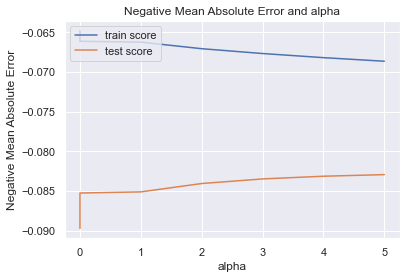

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see Negative mean absolute error stability at around 2 alpha but we use 10 that we got as best param

In [203]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01441364,  0.01077293,  0.02249976,  0.07164821,  0.05428821,
        0.00062598,  0.03190055,  0.00818343,  0.03799936,  0.03987678,
        0.04567111,  0.00310467,  0.07387864,  0.01243627, -0.00112417,
        0.01059028,  0.0131901 , -0.00069984, -0.00676608,  0.00636643,
        0.02193923,  0.01324986, -0.0013702 ,  0.0117091 ,  0.00483917,
        0.01375654,  0.01010762, -0.07088909,  0.05590933,  0.02880781,
        0.05638088,  0.01313884,  0.00185464, -0.01026655, -0.00192433,
        0.01590523, -0.01135585,  0.00346869,  0.01741612, -0.00995034,
       -0.01579594, -0.02072763,  0.00575295, -0.0177113 , -0.00398506,
       -0.00902095,  0.02244983,  0.02708283, -0.00722043,  0.09124349,
       -0.03818129, -0.01165994, -0.06398765, -0.05392357, -0.02936588,
       -0.00896571,  0.01240509, -0.01607244,  0.0151229 ,  0.02771   ,
       -0.02927175, -0.02259328, -0.00065672, -0.00200078,  0.03007937,
        0.05818317, -0.00652921,  0.01911571,  0.00426399,  0.05

Now that we got all the coefficients, lets get their variables too

In [204]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.816),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.011),
 ('LotArea', 0.022),
 ('OverallQual', 0.072),
 ('OverallCond', 0.054),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.046),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.074),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.011),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', -0.001),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.006),
 ('GarageArea', 0.022),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('PropAge', -0.071),
 ('MSZoning_FV', 0.056),
 ('MSZoning_RH', 0.029),
 ('MSZoning_RL', 0.056),
 ('MSZoning_RM', 0.013),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.01),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.016),
 ('LandContour_Low', -0.011),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 (

In [205]:
# ridge regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9308424818872958
0.9096659084948927


In [206]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11366485728171898


We see that we have got similar values as lasso regression and the model performance is also really good where in the test and train scores are matching well

Let us now ccreate a dataframe for the ridge coefficients

In [207]:
# Create a dataframe for Ridge Coefficients
ridge_mod = list(zip(cols, model_parameters))

In [208]:
ridge_paraRFE = pd.DataFrame(ridge_mod)
ridge_paraRFE.columns = ['Variable', 'Coeff']
ridge_res=ridge_paraRFE.sort_values(by=['Coeff'], ascending = False)
ridge_res.head(20)

,Variable,Coeff
0,constant,11.816
50,Neighborhood_Crawfor,0.091
13,GrLivArea,0.074
4,OverallQual,0.072
209,SaleCondition_Normal,0.063
210,SaleCondition_Partial,0.062
66,Neighborhood_StoneBr,0.058
31,MSZoning_RL,0.056
29,MSZoning_FV,0.056
5,OverallCond,0.054


Let us remove the variables that have zero coeffieients

In [209]:
ridge_res = pd.DataFrame(ridge_res[(ridge_res['Coeff'] != 0)])
ridge_res

,Variable,Coeff
0,constant,11.816
50,Neighborhood_Crawfor,0.091
13,GrLivArea,0.074
4,OverallQual,0.072
209,SaleCondition_Normal,0.063
...,...,...
79,BldgType_Twnhs,-0.040
173,KitchenQual_TA,-0.051
54,Neighborhood_MeadowV,-0.054
53,Neighborhood_IDOTRR,-0.064


In [210]:
ridge_res.shape

(204, 2)

### Conclusion

We see that both Lasso and Ridge regression have given us similar values of R2 for both train and test sets, but we can conclude that Lasso is better as it gives a zero value to all the insignificant features, making it more easy to choose predictive variables/features.

Let us now generate the final equation using the coefficients and vairables obtained from Lasso regression

In [133]:
lasso_para

,Variable,Coeff
0,constant,11.828
13,GrLivArea,0.127
210,SaleCondition_Partial,0.116
50,Neighborhood_Crawfor,0.095
4,OverallQual,0.084
209,SaleCondition_Normal,0.060
5,OverallCond,0.057
31,MSZoning_RL,0.050
29,MSZoning_FV,0.046
70,Condition1_Norm,0.044


From the above we can conclude that Surpirse Housing Co has to make sure they look into the predictors of the lasso regression that affect the price of the houses:
1. Higher the value of positive coefficients, higher is the price if the house.
2. Higher the value of negative coefficients, lower is the price of the house.

To conclude,
the following indicate higher sale value:
1. GrLivArea(Above grade (ground) living area square feet)
2. SaleCondition_Partial(Home was not completed when last assessed)
3. Neighborhood_Crawfor(Neighborhood like Crawford)
4. OverallQual(Overall quality is high)
5. SaleCondition_Normal(Condition of sale is Normal)
6. OverallCond(OverallCondition is high)
and a few more.

The following indicate lower sale value:
1. PropAge(Property age is high)
2. Neighborhood_IDOTRR(Neighborhood is Iowa DOT and Rail Road)
3. GarageType_none(When no Garage)
4. KitchenQual_TA(When Kitchen quality is Typical/Average)
5. BldgType_Twnhs(Type of dwelling is Townhouse)
and a few more.